# Plots of Layout PS

A collection of plots of power spectra from the scripts in this directory.

## The Idea

The idea of this notebook is to understand how much wedge-mitigation can be expected to be achieved by a next-generation array of dipoles, using just array layout. The assumptions made in these calculations:

* Flat array of dipoles
* Dipoles are circular and have diameter of $d=1.5$m
* All dipoles have identical Gaussian primary beams with achromatic width $\sigma = 84{\rm m} / d$.
* The Gaussian beam is Gaussian in $(l,m)$ space.
* Observations are "snapshot", i.e. the sky rotation is expected to be negligible.
* The sky/signal consists solely of point-sources, with a statistically uniform distribution over the sky (in angular co-ordinates). 
* Sources follow a power-law source-count relation, with a maximum of 1Jy, and a minimum given by the flux density above which 95% of the second moment of flux lies (i.e. $\int S^2 n(S) dS$). This is a large number of sources (to be worked out...)
* There are no calibration errors, and each antenna position is know precisely.
* Gridding of visibilities is performed via a weighted sum of measured visibilities at grid nodes, with the weight kernel given by the Fourier transform of the beam.
* Layouts currently investigated can be seen below, and consist of regular- and log-spaced polar grids, and randomly filled circles with a density gradient of zero and one. Each kind of layout is tested for 256, 1e3 and 1e4 antennas (approximately). 


**Implementation Details**
* Gridding:
    * Gridding is done directly onto a polar grid, which alleviates any biases from circular averaging with square bins, also allowing for simple log-space bins in $u$. 
    * Gridding is made fast by using a KD-tree to determine close-enough visibilities that should be weighted onto the current grid-point.
* Visibilities:
    * The visibility calculation is done in C, but is not smart: every source, frequency and baseline is summed over.
    
**Difficulties**
* Performance:
    * At current speeds and settings (~6000 sources, 32 frequencies), we expect 1000 antennas to take 4hrs and 1e5 antennas to take 400 hrs to run.
    * Bottleneck by far is the computation of visibilities from point-sources.
* Layouts:
    * Regular/Log spokes layouts need to have a lot of spokes to work in the high-$N$ cases (otherwise they just don't fit). This can be done, of course, but then to compare them to the small-$N$ cases requires those to also have lots of spokes, which means the high-density spokes cases can't really be tested in this framework. 
    * Potentially could change number of spokes with $N$. 
    
**Ideas for Improvement**
* Thermal noise: including thermal noise may enable useful comparison between layouts with different compactness.
* Increase peeling limit to 10Jy? May enable fewer sources, but not sure how reasonable this is.
* Add layouts that are not bound by a given $R_{\rm max}$ -- have arbitrarily large arrays that can be more precisely tailored (perhaps at a cost of thermal noise).
    * This would allow for crazy things like 1D arrays in the $N=10000$ case.
* Have a think about how to optimally design antenna layouts to yield given baseline layout.

### Setup

In [1]:
from pssim.plots import plot_power
from pssim import layouts
import h5py
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# Basic parameters (shared)

## Layouts

/home/steven/Documents/Projects/EOR/MyCodes/point_source_simulator/pssim/layouts.py:199: UserWarning: From an attempt of laying 1000 antennae, only 982 could be laid
  "From an attempt of laying %s antennae, only %s could be laid" % (n_per_spoke * nspokes + 1, len(R)))
/home/steven/Documents/Projects/EOR/MyCodes/point_source_simulator/pssim/layouts.py:199: UserWarning: From an attempt of laying 9964 antennae, only 7246 could be laid
  "From an attempt of laying %s antennae, only %s could be laid" % (n_per_spoke * nspokes + 1, len(R)))
/home/steven/Documents/Projects/EOR/MyCodes/point_source_simulator/pssim/layouts.py:199: UserWarning: From an attempt of laying 244 antennae, only 190 could be laid
  "From an attempt of laying %s antennae, only %s could be laid" % (n_per_spoke * nspokes + 1, len(R)))
/home/steven/Documents/Projects/EOR/MyCodes/point_source_simulator/pssim/layouts.py:199: UserWarning: From an attempt of laying 973 antennae, only 811 could be laid
  "From an attempt of lay

LEVEL=0, N=256, n=256
LEVEL=1, N=256, n=7
LEVEL=0, N=1000, n=1000
LEVEL=1, N=1000, n=47
LEVEL=2, N=1000, n=2
LEVEL=0, N=10000, n=10000
LEVEL=1, N=10000, n=3366
LEVEL=2, N=10000, n=2049
LEVEL=3, N=10000, n=1348
LEVEL=4, N=10000, n=967
LEVEL=5, N=10000, n=682
LEVEL=6, N=10000, n=504
LEVEL=7, N=10000, n=387
LEVEL=8, N=10000, n=305
LEVEL=9, N=10000, n=230
LEVEL=10, N=10000, n=181
LEVEL=11, N=10000, n=135
LEVEL=12, N=10000, n=98
LEVEL=13, N=10000, n=71
LEVEL=14, N=10000, n=56
LEVEL=15, N=10000, n=50
LEVEL=16, N=10000, n=40
LEVEL=17, N=10000, n=28
LEVEL=18, N=10000, n=25
LEVEL=19, N=10000, n=18
LEVEL=20, N=10000, n=15
LEVEL=21, N=10000, n=11
LEVEL=22, N=10000, n=8
LEVEL=23, N=10000, n=8
LEVEL=24, N=10000, n=7
LEVEL=25, N=10000, n=5
LEVEL=26, N=10000, n=5
LEVEL=27, N=10000, n=4
LEVEL=28, N=10000, n=4
LEVEL=29, N=10000, n=4
LEVEL=30, N=10000, n=4
LEVEL=31, N=10000, n=3
LEVEL=32, N=10000, n=3
LEVEL=33, N=10000, n=3
LEVEL=34, N=10000, n=2
LEVEL=35, N=10000, n=2
LEVEL=36, N=10000, n=1
LEVEL=37, N

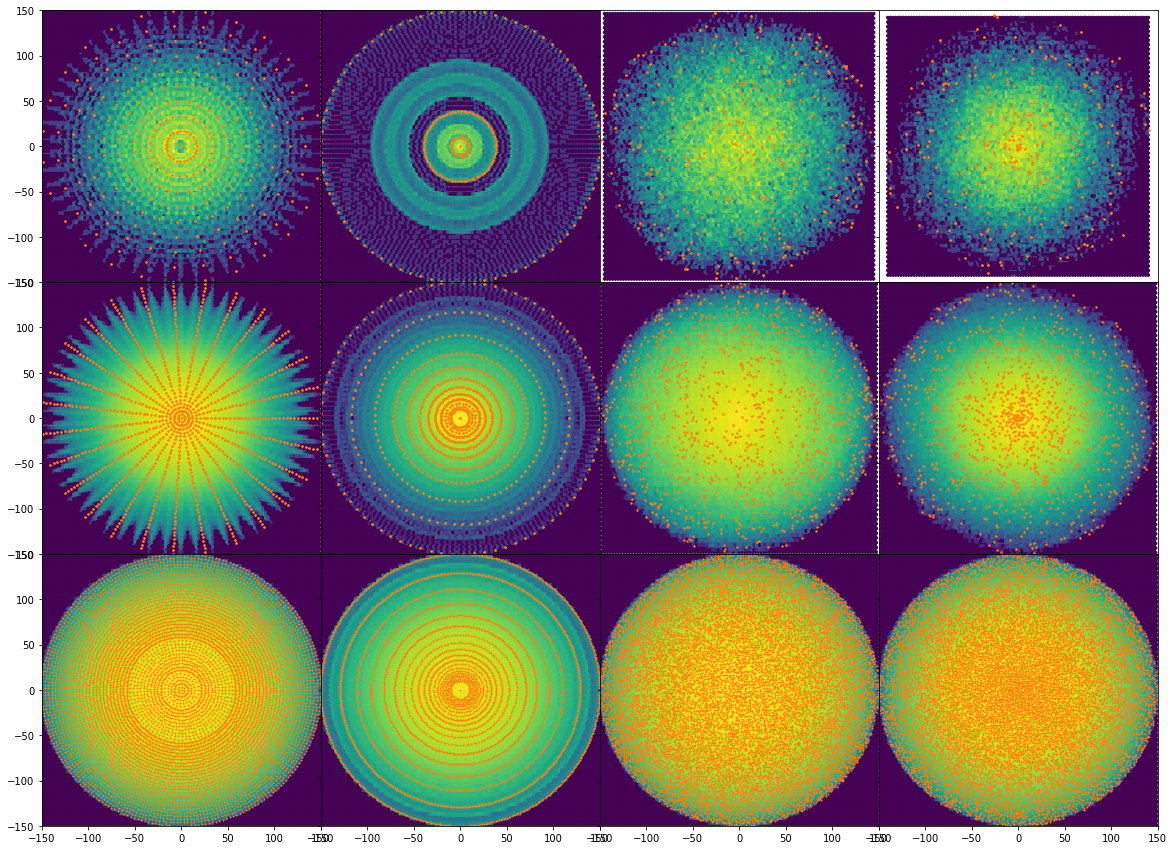

In [5]:
fig, ax = plt.subplots(
    3, 4, figsize=(20,15), sharex=True, sharey=True, 
    subplot_kw={"xlim":(-150., 150.),"ylim":(-150., 150)},
    gridspec_kw={"hspace":0, "wspace":0}
)

hexbin_kw = {"bins":'log'}


bl, [x,y] = layouts.get_baselines_spokes(256, nspokes=3, umin=10, umax=150, antenna_diameter=1.5, base=3, log=False)
ax[0,0].hexbin(bl[0], bl[1], **hexbin_kw)
ax[0,0].scatter(x,y,s=3, color='C1')

bl, [x,y] = layouts.get_baselines_spokes(1000, nspokes=3, umin=10, umax=150, antenna_diameter=1.5, base=3, log=False)
ax[1,0].hexbin(bl[0], bl[1], **hexbin_kw)
ax[1,0].scatter(x,y,s=3, color='C1')

bl, [x,y] = layouts.get_baselines_spokes(10000, nspokes=5, umin=10, umax=150, antenna_diameter=1.5, base=3, log=False)
ax[2,0].hexbin(bl[0], bl[1], **hexbin_kw)
ax[2,0].scatter(x,y,s=1, color='C1')


bl, [x,y] = layouts.get_baselines_spokes(256, nspokes=4, umin=10, umax=150, antenna_diameter=1.5, base=3, log=True)
ax[0,1].hexbin(bl[0], bl[1], **hexbin_kw)
ax[0,1].scatter(x,y,s=3, color='C1')

bl, [x,y] = layouts.get_baselines_spokes(1000, nspokes=4, umin=10, umax=150, antenna_diameter=1.5, base=3, log=True)
ax[1,1].hexbin(bl[0], bl[1], **hexbin_kw)
ax[1,1].scatter(x,y,s=3, color='C1')

bl, [x,y] = layouts.get_baselines_spokes(10000, nspokes=9, umin=10, umax=150, antenna_diameter=1.5, base=2, log=True)
ax[2,1].hexbin(bl[0], bl[1], **hexbin_kw)
ax[2,1].scatter(x,y,s=1, color='C1')


bl, [x,y] = layouts.get_baselines_filled_circle(N=256, umax=150, alpha=0, antenna_diameter=1.5)
ax[0,2].hexbin(bl[0], bl[1], **hexbin_kw)
ax[0,2].scatter(x,y,s=3, color='C1')

bl, [x,y] = layouts.get_baselines_filled_circle(N=1000, umax=150, alpha=0, antenna_diameter=1.5)
ax[1,2].hexbin(bl[0], bl[1], **hexbin_kw)
ax[1,2].scatter(x,y,s=2, color='C1')

bl, [x,y] = layouts.get_baselines_filled_circle(N=10000, umax=150, alpha=0, antenna_diameter=1.5, maxlevel=50)
ax[2,2].hexbin(bl[0], bl[1], **hexbin_kw)
ax[2,2].scatter(x,y,s=1, color='C1')


bl, [x,y] = layouts.get_baselines_filled_circle(N=256, umax=150, alpha=-1, antenna_diameter=1.5)
ax[0,3].hexbin(bl[0], bl[1], **hexbin_kw)
ax[0,3].scatter(x,y,s=3, color='C1')

bl, [x,y] = layouts.get_baselines_filled_circle(N=1000, umax=150, alpha=-1, antenna_diameter=1.5)
ax[1,3].hexbin(bl[0], bl[1], **hexbin_kw)
ax[1,3].scatter(x,y,s=2, color='C1')

bl, [x,y] = layouts.get_baselines_filled_circle(N=10000, umax=150, alpha=-1, antenna_diameter=1.5, maxlevel=50)
ax[2,3].hexbin(bl[0], bl[1], **hexbin_kw)
ax[2,3].scatter(x,y,s=1, color='C1')


## Power Spectra

In [13]:
!ls outputs

numerical_filled_circle_0.0256_10.00_150.00_40_32_40.00_500.00_150_blackman_10_1.5.h5
numerical_spokes_lin_1_10.0128_10.00_150.00_40_32_40.00_500.00_150_blackman_10_1.5.h5
numerical_spokes_lin_1_10.0256_10.00_150.00_40_32_40.00_500.00_150_blackman_10_1.5.h5
numerical_spokes_lin_3_10.01000_10.00_150.00_40_32_40.00_500.00_150_blackman_10_1.5.h5
numerical_spokes_lin_3_10.0256_10.00_150.00_40_32_40.00_500.00_150_blackman_10_1.5.h5
numerical_spokes_lin_8_10.0128_10.00_150.00_40_32_40.00_500.00_150_blackman_10_1.5.h5
numerical_spokes_lin_8_10.0256_10.00_150.00_40_32_40.00_500.00_150_blackman_10_1.5.h5
numerical_spokes_log_3_10.0256_10.00_150.00_40_32_40.00_500.00_150_blackman_10_1.5.h5
numerical_spokes_log_4_10.01000_10.00_150.00_40_32_40.00_500.00_150_blackman_10_1.5.h5
numerical_spokes_log_4_10.0256_10.00_150.00_40_32_40.00_500.00_150_blackman_10_1.5.h5


In [15]:
filename_template = "outputs/numerical_{kind}_{log}_{nspokes}_10.0{n_ant}_10.00_150.00_40_32_40.00_500.00_150_blackman_10_1.5.h5"

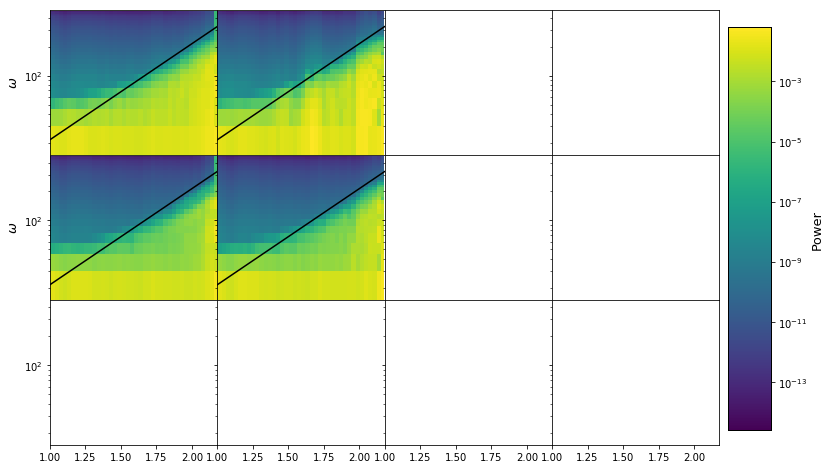

In [19]:
fig, ax = plt.subplots(
    3, 4, figsize=(12,8), sharex=True, sharey=True, 
    gridspec_kw={"hspace":0, "wspace":0}
)


power = []
with h5py.File(filename_template.format(kind="spokes",log="lin",n_ant=256, nspokes=3), 'r') as f:
    omega = f['omega'][...]
    power += [np.mean(f['power'][...], axis=0)]
    u = f['u'][...]
    
with h5py.File(filename_template.format(kind="spokes",log="lin",n_ant=1000, nspokes=3), 'r') as f:
    power += [np.mean(f['power'][...], axis=0)]
    
with h5py.File(filename_template.format(kind="spokes",log="log",n_ant=256, nspokes=4), 'r') as f:
    power += [np.mean(f['power'][...], axis=0)]
    
with h5py.File(filename_template.format(kind="spokes",log="log",n_ant=1000, nspokes=4), 'r') as f:
    power += [np.mean(f['power'][...], axis=0)]
    
vmin = np.min(power)
vmax = np.max(power)

kw = dict(omega_is_logscale=False, lognorm=True, horizon_line=2, vmin=vmin, vmax=vmax)

plot_power(power[0].T, u, omega, fig=fig, ax=ax[0,0], xlabel=False, **kw)
plot_power(power[1].T, u, omega, fig=fig, ax=ax[1,0], xlabel=False, **kw)
plot_power(power[2].T, u, omega, fig=fig, ax=ax[0,1], xlabel=False, ylabel=False, **kw)    
plot_power(power[3].T, u, omega, fig=fig, ax=ax[1,1], xlabel=False, ylabel=False, **kw);

